In [1]:
import tensorflow as tf

In [2]:
x = tf.ones(shape=(2,1))
print(x)

x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.random.normal(shape=(3,1), mean=0, stddev = 1)
print(x)

x = tf.random.uniform(shape=(3,1), minval=0, maxval=1)
print(x)

tf.Tensor(
[[ 0.04875486]
 [ 0.09545383]
 [-0.00895152]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.8658508 ]
 [0.7027919 ]
 [0.56618774]], shape=(3, 1), dtype=float32)


In [4]:
v = tf.Variable(initial_value= tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.4438562],
       [ 1.096252 ],
       [-0.4247399]], dtype=float32)>


In [5]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [6]:
v[0,0].assign(3)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [7]:
print(v.assign_add(v))
print(v.assign_add(tf.ones((3,1))))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[6.],
       [2.],
       [2.]], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[7.],
       [3.],
       [3.]], dtype=float32)>


In [8]:
a = tf.random.uniform(shape=(2,2), minval=0, maxval=1)
print('Random unifrom intialization of a (2*2) matrix')
print(a)
b = tf.square(a)
print('')
print('Squaring the matrix')
print(b)
c = tf.sqrt(a)
print('')
print('Square root of the matrix')
print(c)
d = b * c
print('')
print('Squared values of a * Square root values of a - Element wise')
print(d)
e = tf.matmul(b,c)
print('')
print('Dot product of the same above')
print(e)

Random unifrom intialization of a (2*2) matrix
tf.Tensor(
[[0.66908395 0.9175514 ]
 [0.7392621  0.8723953 ]], shape=(2, 2), dtype=float32)

Squaring the matrix
tf.Tensor(
[[0.44767335 0.8419006 ]
 [0.54650843 0.7610735 ]], shape=(2, 2), dtype=float32)

Square root of the matrix
tf.Tensor(
[[0.8179755  0.957889  ]
 [0.8598035  0.93402106]], shape=(2, 2), dtype=float32)

Squared values of a * Square root values of a - Element wise
tf.Tensor(
[[0.36618584 0.8064473 ]
 [0.46988985 0.7108587 ]], shape=(2, 2), dtype=float32)

Dot product of the same above
tf.Tensor(
[[1.090055  1.2151742]
 [1.1014042 1.2343531]], shape=(2, 2), dtype=float32)


In [9]:
initial_value = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(initial_value) # <- TensorFlow remembers this is x^2
gradient = tape.gradient(result, initial_value)  # <- TensorFlow computes 2 * x

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [10]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(initial_value)
gradient = tape.gradient(result, initial_value)

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [11]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

print(position)
print(speed)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


In [17]:
import numpy as np

num_samples_per_class = 1000
negative_class = np.random.multivariate_normal(
    mean = [0, 3],
    cov  = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class)
positive_class = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class)

print(f'Negative class shape : {negative_class.shape}')
print(f'\nNegative class first row sample : {negative_class[0]}')
print(f'\nPostive class shape : {positive_class.shape}')
print(f'\nPostive class first row sample : {positive_class[0]}')


Negative class shape : (1000, 2)

Negative class first row sample : [-0.11467123  2.81190459]

Postive class shape : (1000, 2)

Postive class first row sample : [ 3.17453749 -1.61816519]


In [23]:
inputs = np.vstack((negative_class, positive_class)).astype('float32')
print(f'Inputs shape: {inputs.shape}')
print(f'\nInputs first row sample: {inputs[0]}')

Inputs shape: (2000, 2)

Inputs first row sample: [-0.11467123  2.8119047 ]


In [27]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = 'float32'),
                     np.ones((num_samples_per_class, 1), dtype = 'float32')))
print(f'Targets shape: {targets.shape}')
print(f'\nTargets first row sample: {targets[0]}')

Targets shape: (2000, 1)

Targets first row sample: [0.]


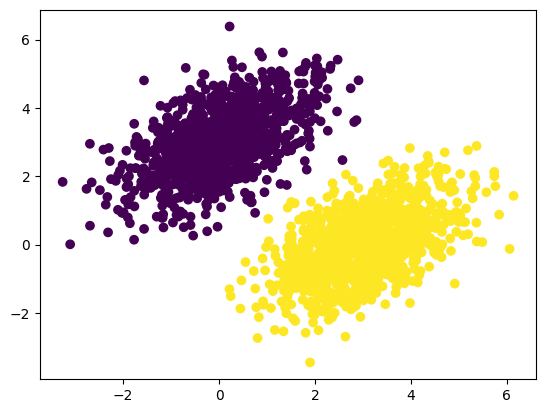

In [28]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [30]:
input_shape  = 2
output_shape = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_shape, output_shape)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_shape,)))

print(f'Initial weights are:\n {W}')
print(f'\nInitial biases are:\n {b}')

Initial weights are:
 <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.05317056],
       [0.3947903 ]], dtype=float32)>

Initial biases are:
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [ ]:
def model(inputs):
  return tf.matmul(inputs, W) + b